COM computations in GC21 simulations

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.linalg import norm
import nba
#import pynbody

In [3]:
snapshot="/home/ngc/Work/research/data/GC21/"
snapname = "MWLMC5_100M_b0_vir_OM3_G4_110.hdf5"

To load the DM particle of the host (by default galaxy=0) we use the load_halo function in nba 

In [4]:
GC21_mwhalo = nba.ios.ReadGC21(snapshot, snapname)
GC21_mwhalo_data = GC21_mwhalo.read_halo(
    ['pos', 'vel', 'mass', 'pid', 'pot'], 
    halo='MW', randomsample=500000, ptype='dm')


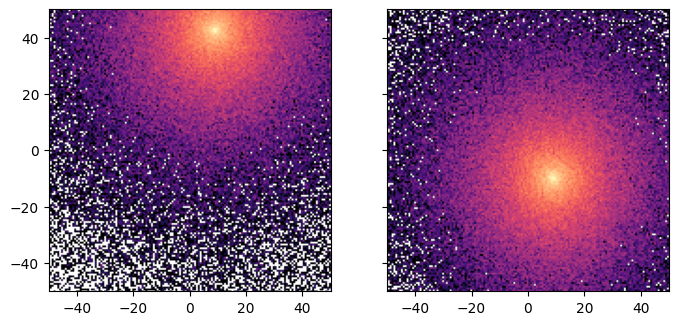

In [5]:

fig, ax = plt.subplots(1, 2, figsize=(8,12), sharex=True, sharey=True)
i=0
for particles in [GC21_mwhalo_data]:
    rsat = norm(particles['pos'], axis=1)
    rcut = np.where(rsat<100)[0]
    Hh, xh, yh = np.histogram2d(particles['pos'][rcut,0], 
                            particles['pos'][rcut,1], bins=300)
    ax[0].imshow(Hh.T, norm=LogNorm(), cmap='magma', origin='lower',
           extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
    ax[0].set_xlim(-50, 50)
    ax[0].set_ylim(-50, 50)

    Hh, xh, yh = np.histogram2d(particles['pos'][rcut,0], 
                            particles['pos'][rcut,2], bins=300)
    ax[1].imshow(Hh.T, norm=LogNorm(), cmap='magma', origin='lower',
           extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
    ax[1].set_xlim(-50, 50)
    ax[1].set_ylim(-50, 50)
    i+=1

plt.show()

# Compute COM with the potential minimum

In [6]:
mwhalo_com = nba.com.CenterHalo(GC21_mwhalo_data)


In [7]:
rbins = 10
rcut = np.linspace(1, 10, rbins)

mwhalo_com_pot  =  np.zeros((rbins, 3))
mwhalo_vcom_pot  =  np.zeros((rbins, 3))

i=0
for r in rcut:
    mwhalo_com_pot[i], mwhalo_vcom_pot[i] = mwhalo_com.min_potential(rcut=r)
    i+=1

In [8]:
mwhalo_com_pot

array([[ 8.91090298, 42.5045433 , -9.97280598],
       [ 8.93707561, 42.50593948, -9.95148277],
       [ 8.94365311, 42.48276138, -9.95146942],
       [ 8.92395115, 42.50854111, -9.98273087],
       [ 8.92689705, 42.48465347, -9.97022152],
       [ 8.94614506, 42.48520279, -9.98410225],
       [ 8.9246273 , 42.48479462, -9.9791975 ],
       [ 8.92621708, 42.48441696, -9.96305084],
       [ 8.92236328, 42.48099518, -9.96623707],
       [ 8.93377209, 42.47190857, -9.97689629]])

In [9]:
mwhalo_com.recenter(mwhalo_com_pot[3], mwhalo_vcom_pot[3])

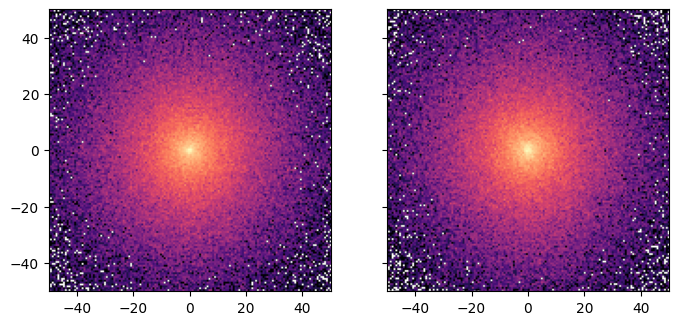

In [10]:

fig, ax = plt.subplots(1, 2, figsize=(8,12), sharex=True, sharey=True)
i=0
for particles in [GC21_mwhalo_data]:
    rsat = norm(particles['pos'], axis=1)
    rcut = np.where(rsat<100)[0]
    Hh, xh, yh = np.histogram2d(particles['pos'][rcut,0], 
                            particles['pos'][rcut,1], bins=300)
    ax[0].imshow(Hh.T, norm=LogNorm(), cmap='magma', origin='lower',
           extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
    ax[0].set_xlim(-50, 50)
    ax[0].set_ylim(-50, 50)

    Hh, xh, yh = np.histogram2d(particles['pos'][rcut,0], 
                            particles['pos'][rcut,2], bins=300)
    ax[1].imshow(Hh.T, norm=LogNorm(), cmap='magma', origin='lower',
           extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
    ax[1].set_xlim(-50, 50)
    ax[1].set_ylim(-50, 50)
    i+=1

plt.show()

In [11]:
bins = np.linspace(0, 300, 100)
GC21_profiles = nba.structure.Profiles(GC21_mwhalo_data['pos'], edges=bins)

In [19]:
smoothing = np.linspace(0, 2, 5)
Ds = np.zeros((len(smoothing), len(bins)-1))
for i in range(len(smoothing)):
    R, Ds[i] = GC21_profiles.density(mass=GC21_mwhalo_data['mass'], smooth=smoothing[i])

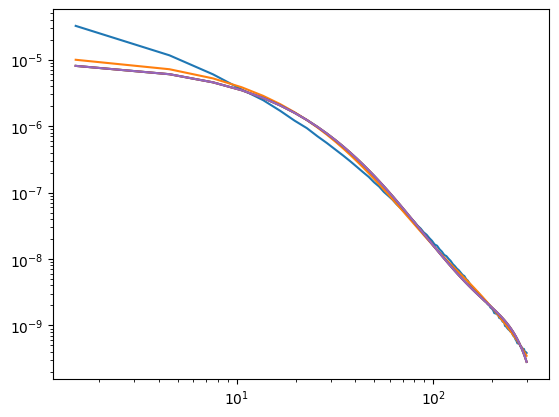

In [21]:
for i in range(len(smoothing)):
    plt.loglog(R, Ds[i])
